In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
df = pd.read_csv('data.csv')

In [163]:
df = df[(df['iso_code']=='FRA') | (df['iso_code']=='GBR') | (df['iso_code']=='ITA')|
        (df['iso_code']=='CHE') | (df['iso_code']=='DEU') | (df['iso_code']=='PRT') ]

In [164]:
df = df[(df['date'] >= '2020-03-15') & (df['date'] <= '2020-11-09')]

In [165]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
17891,FRA,Europe,France,2020-03-15,4499.0,838.0,540.429,91.0,12.0,11.571,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
17892,FRA,Europe,France,2020-03-16,5423.0,924.0,613.857,127.0,36.0,15.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
17893,FRA,Europe,France,2020-03-17,6633.0,1210.0,745.857,148.0,21.0,16.857,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
17894,FRA,Europe,France,2020-03-18,7730.0,1097.0,849.429,175.0,27.0,20.286,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
17895,FRA,Europe,France,2020-03-19,9134.0,1404.0,979.000,244.0,69.0,28.000,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901


In [166]:
dfSub = df[['location', 'date','new_cases','population', 'population_density']]

In [167]:
#dfSub.to_csv(r'relevantData.csv', index = False)

In [168]:
A = dfSub[dfSub['location']!='France']

In [169]:
A = A[['location','new_cases','population']]

In [170]:
germ = A[A['location']=='Germany'].reset_index().drop('index',axis=1)
ita = A[A['location']=='Italy'].reset_index().drop('index',axis=1)
port = A[A['location']=='Portugal'].reset_index().drop('index',axis=1)
swi = A[A['location']=='Switzerland'].reset_index().drop('index',axis=1)
unk = A[A['location']=='United Kingdom'].reset_index().drop('index',axis=1)

In [171]:
N = pd.DataFrame(columns=['Italy','United Kingdom'],index = range(0,240))
N['United Kingdom'] = unk['new_cases']
N['Italy']= ita['new_cases']
#N['Portugal'] = port['new_cases']
#N['Switzerland'] = swi['new_cases']
N['Germany'] = germ['new_cases']

N

,Italy,United Kingdom,Germany
0,3497.0,478.0,733.0
1,2823.0,361.0,1043.0
2,4000.0,442.0,1174.0
3,3526.0,611.0,1144.0
4,4207.0,769.0,1042.0
...,...,...,...
235,30548.0,25177.0,19990.0
236,34502.0,24138.0,21506.0
237,37802.0,23287.0,23399.0
238,39809.0,24957.0,16017.0


In [172]:
A = N.to_numpy()
A

array([[ 3497.,   478.,   733.],
       [ 2823.,   361.,  1043.],
       [ 4000.,   442.,  1174.],
       [ 3526.,   611.,  1144.],
       [ 4207.,   769.,  1042.],
       [ 5322.,   999.,  5940.],
       [ 5986.,  1055.,  4049.],
       [ 6557.,  1255.,  3276.],
       [ 5560.,  1198.,  3311.],
       [ 4789.,  1378.,  4438.],
       [ 5249.,  2338.,  2342.],
       [ 5210.,  2375.,  4954.],
       [ 6153.,  2692.,  5780.],
       [ 5959.,  3087.,  6294.],
       [ 5974.,  3197.,  3965.],
       [ 5217.,  2822.,  4751.],
       [ 4050.,  2858.,  4615.],
       [ 4053.,  4273.,  5453.],
       [ 4782.,  4514.,  6156.],
       [ 4668.,  4913.,  6174.],
       [ 4585.,  4868.,  6082.],
       [ 4805.,  4911.,  5936.],
       [ 4316.,  4020.,  3677.],
       [ 3599.,  3592.,  3834.],
       [ 3039.,  5282.,  4003.],
       [ 3836.,  5450.,  4974.],
       [ 4204.,  5131.,  5323.],
       [ 3951.,  4858.,  4133.],
       [ 4694.,  4313.,  2821.],
       [ 4092.,  3579.,  2537.],
       [ 3

In [173]:
b = dfSub[dfSub['location']=='France']

In [174]:
b = b[['new_cases']]

In [175]:
b=b.to_numpy()
for i in range(0,240):
    if b[i] == 0:
        b[i]= b[i-1]
    elif b[i]<0:
        b[i]= -b[i]
b

array([[8.3800e+02],
       [9.2400e+02],
       [1.2100e+03],
       [1.0970e+03],
       [1.4040e+03],
       [1.8610e+03],
       [1.6170e+03],
       [1.8470e+03],
       [1.5590e+03],
       [3.8380e+03],
       [2.4460e+03],
       [2.9310e+03],
       [3.9220e+03],
       [3.8090e+03],
       [4.6110e+03],
       [2.5990e+03],
       [4.3760e+03],
       [7.5780e+03],
       [4.8610e+03],
       [2.1160e+03],
       [5.2330e+03],
       [4.2670e+03],
       [1.8730e+03],
       [3.9120e+03],
       [3.7770e+03],
       [3.8810e+03],
       [4.2860e+03],
       [4.3420e+03],
       [3.1140e+03],
       [1.6130e+03],
       [2.6730e+03],
       [5.4970e+03],
       [2.6330e+03],
       [2.6410e+03],
       [4.0500e+02],
       [2.5690e+03],
       [7.8500e+02],
       [2.0510e+03],
       [2.6670e+03],
       [1.8270e+03],
       [1.6530e+03],
       [1.7730e+03],
       [1.5370e+03],
       [4.6100e+02],
       [1.1950e+03],
       [1.0650e+03],
       [1.6070e+03],
       [1.139

In [176]:
A_train = A[:220]
b_train = b[:220]
A_test = A[220:] ## ten days in november 2020
b_test = b[220:]

In [177]:
 x = (np.linalg.inv((A_train.transpose()@A_train)))@A_train.transpose()@b_train
    ##minimization (by def), using train only

In [178]:
x 

array([[ 0.49642824],
       [ 0.97945742],
       [-0.05684513]])

In [179]:
predictions = A_test@x


In [180]:
 r=predictions - b_test

np.linalg.norm(r)

69432.63043962554

<AxesSubplot:ylabel='Count'>

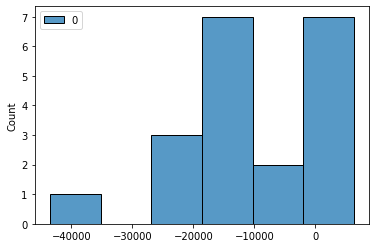

In [181]:
sns.histplot(r)

In [182]:
def Atest(index):
    return predictions[index]
def Btest(index):
    return b_test[index]

days = range(0,20)

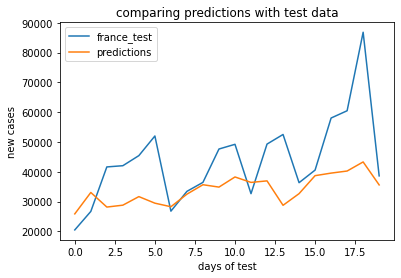

In [183]:
plt.figure()
plt.plot(days,Btest(days))
plt.plot(days,Atest(days))
plt.xlabel('days of test')
plt.ylabel('new cases')
plt.title('comparing predictions with test data')
plt.legend(['france_test','predictions'])


In [233]:
W= np.eye(220)
for i in range (0,20):
    W[i][i] = 0.3
for i in range (20,30):
    W[i][i] = 0.3
for i in range (30,40):
    W[i][i] = 0.3




In [234]:
x_weight = np.linalg.inv(A_train.transpose()@W@A_train)@A_train.transpose()@W@b_train

In [235]:
predictions2 = A_test@x_weight

In [236]:
def A2test(index):
    return predictions2[index]

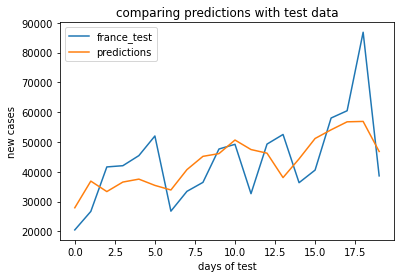

In [237]:
plt.figure()
plt.plot(days,Btest(days))
plt.plot(days,A2test(days))
plt.xlabel('days of test')
plt.ylabel('new cases')
plt.title('comparing predictions with test data')
plt.legend(['france_test','predictions'])

In [238]:
 r2=predictions2 - b_test

np.linalg.norm(r2)

48869.76274629512

<AxesSubplot:ylabel='Count'>

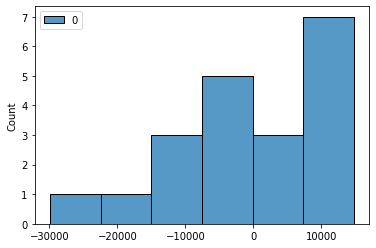

In [239]:
sns.histplot(r2)